# Homework09

Exercises to practice dimensionality reduction with PCA

## Goals

- Add unsupervised pre-processing to our ML flow: encode -> normalize -> pre-process -> train -> evaluate
- Build an intuition for PCA and when/how to use it
- Understand the benefits of dimensionality reduction

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework.

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/image_utils.py
!wget -q https://github.com/PSAM-5020-2025S-A/Homework07/raw/main/Homework07_utils.pyc

!wget -qO- https://github.com/PSAM-5020-2025S-A/5020-utils/releases/latest/download/0801-500.tar.gz | tar xz

In [36]:
import PIL.Image as PImage

from os import listdir, path

from data_utils import PCA, RandomForestClassifier, SklStandardScaler, pd, np #Trying out smth importing SklSS and pd

from image_utils import get_pixels, make_image


from Homework07_utils import CamUtils

## PCA and Classification

Let's practice doing some more image classification with `PCA` and analyzing the results.

The dataset is the same one we used in `Homework07`. It has images from $25$ different security cameras, and our task is to separate them by camera. Some of the cameras move, some of them don't, and there are more than $1000$ images, so there's no way we want to do this by hand.

Let's start by loading the training images into a list of pixels, like we did with the `faces` dataset in class.

### Loading Data

If we look at the images in `./data/image/0801-500/train/`, we'll notice that they are named and organized in a slightly different way. They're all in the same directory and the first part of their filename specifies which camera they came from. Even though those `ids` are numbers, they're not sequential, so we'll use some helper functions to extract a unique `label` from their filenames.

This is exactly what the `OrdinalEncoder` class does, but since we only have to encode this one column, we'll do it by hand while we read the files in.

In [5]:
# this creates a list of all the files in a given directory, that end in .jpg
train_files = [f for f in listdir("./data/image/0801-500/train") if f.endswith(".jpg")]

In [6]:
# TODO: check and see what is inside the list here
print('Printing couple of first files:')
train_files[:4]

Printing couple of first files:


['17-85.jpg', '26-29.jpg', '07-11.jpg', '13-47.jpg']

Now we'll read the image pixels and extract their labels. `CamUtils.get_label()` is the helper function we'll use to "encode" and return a label id based on the filename.

In [7]:
pixel_data = []
label_data = []

for fname in train_files:
  label = CamUtils.get_label(fname)
  img = PImage.open(path.join("./data/image/0801-500/train", fname))
  pixel_data.append(get_pixels(img))
  label_data.append(label)

In [8]:
# TODO: check if labels got extracted correctly by looking at 
#       the first few items of the label list and the filename list

print(label_data[:50])
print(pixel_data[:3])

[13, 21, 5, 11, 18, 22, 9, 16, 1, 7, 18, 18, 20, 19, 5, 14, 8, 21, 5, 7, 16, 21, 13, 22, 11, 16, 3, 1, 24, 24, 12, 14, 1, 17, 21, 7, 21, 0, 8, 17, 8, 14, 12, 5, 13, 19, 14, 23, 1, 18]
[[102, 103, 105, 106, 107, 108, 108, 108, 111, 109, 106, 103, 102, 103, 105, 106, 103, 107, 113, 117, 118, 116, 112, 108, 88, 84, 80, 78, 82, 91, 100, 107, 119, 120, 122, 124, 125, 126, 126, 126, 128, 128, 127, 125, 121, 117, 113, 110, 94, 89, 82, 78, 78, 84, 93, 98, 111, 111, 111, 111, 112, 112, 112, 113, 114, 113, 113, 112, 110, 109, 109, 108, 111, 111, 112, 114, 116, 117, 118, 119, 119, 119, 119, 120, 121, 122, 122, 123, 119, 119, 119, 119, 120, 120, 120, 120, 119, 119, 120, 120, 121, 122, 123, 123, 115, 116, 116, 117, 117, 118, 118, 118, 122, 122, 121, 121, 120, 119, 118, 118, 121, 118, 124, 124, 113, 112, 119, 119, 115, 112, 114, 120, 120, 115, 114, 118, 114, 131, 140, 143, 149, 144, 132, 129, 161, 168, 175, 178, 176, 175, 177, 180, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 175, 174, 171, 168

Like in `Homework07`, the labels and the filenames won't match exactly since labels start at $0$ and the filenames start at $01$ and skip some numbers.

We can open some images from pixels, just to make sure we loaded them correctly:

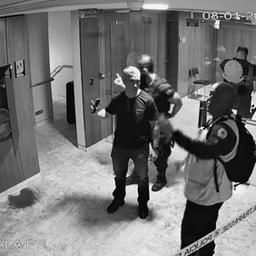

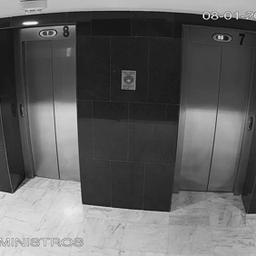

In [9]:
display(make_image(pixel_data[0], width=256))
display(make_image(pixel_data[10], width=256))

### PCA

Create a `DataFrame` called `cam_pca_df` by running `PCA` on the list of pixel data, just like we did in class, and then append a `label` column to it, just like we did in Homewokr07 with: `train_df["label"] = label_data`.

You can change how many components to extract from the images later, but for this first run just use $10$ components so we can compare classification with $10$ `PCA` components to the classification with $10$ random features from `Homework07`.  Make sure to confirm how much of the `variance` is preserved by this transformation.

In [72]:
pixel_data_scaled = scaler.fit_transform(pixel_data)
pixel_data_list   = pixel_data_scaled.tolist()

# TODO: run PCA, get DataFrame
n_components = 5
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(pixel_data_list)
cam_pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# TODO: add "label" column
cam_pca_df['label'] = label_data

# TODO: print variance
variance_ratio = pca.explained_variance_ratio_
total_variance = sum(variance_ratio)
print(f"Variance explained by each component: {variance_ratio}")
print(f"Total variance preserved: {total_variance:.4f} ({total_variance*100:.2f}%)")

# TODO: take a look at the first 5 rows
print(cam_pca_df.head())


Variance explained by each component: [0.24322743 0.15067341 0.12189229 0.07729244 0.04889124]
Total variance preserved: 0.6420 (64.20%)
          PC1         PC2         PC3        PC4  PC5  label
0   25.247581  -42.123137   89.382980  35.466680  NaN     13
1  -35.242073   41.527224   58.044164  -8.813927  NaN     21
2 -171.661988  128.494064 -109.536684 -71.125231  NaN      5
3 -101.849884  -19.442969   92.854975 -36.305689  NaN     11
4  -98.151785  -82.251585  141.925026  22.195522  NaN     18


### Interpretation

<span style="color:hotpink">
How many components did you keep ?<br>

I kept 10 components as stated in the instructions and then changed it to 5 and realized that the variance rate didn't change much<br>

What percent of variance is kept by this transformation?
78.9% --> 71.61%
</span>

In [73]:
print(pca_result.shape)
print(f"Original image dimensions: {img.size}")
print(type(pca_result))

(250, 5)
Original image dimensions: (256, 256)
<class 'pandas.core.frame.DataFrame'>


### Reconstruct

Before we go run our classification, let's take a look at some reconstructed images, just to make sure they make sense.

Take a look at reconstructed versions of images $0$, $10$, and whichever other images you might have opened above.

We did this in class. It involves a `inverse_transform()` function.

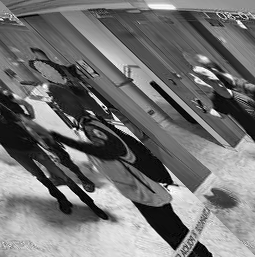

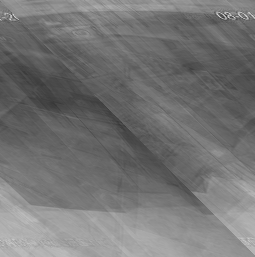

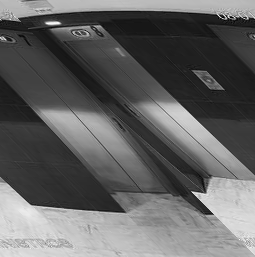

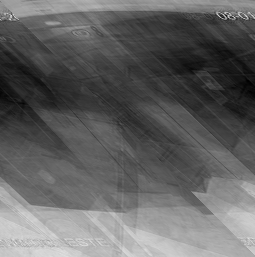

In [74]:
pca_pixels_scaled = pca.inverse_transform(pca_result)
recon_pixels = scaler.inverse_transform(pca_pixels_scaled)

img_width = 255

# TODO: reconstruct image at index 0
idx = 0
display(make_image(pixel_data[idx],    width=img_width))
display(make_image(recon_pixels[idx].tolist(), width=img_width))

# TODO: reconstruct image at index 10
idx = 10
display(make_image(pixel_data[idx],     width=img_width))
display(make_image(recon_pixels[idx].tolist(),  width=img_width))

The reconstructed images should look blurrier and noisier than the original ones, but they should still look something like the original ones.

### Classify !

Train a `RandomForestClassifier` on the `PCA` data.

Remember to separate the output feature (`label`) from the input features (`PC0`, `PC1`, etc).

In [75]:
# TODO: create a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# TODO: split input and output features
X = cam_pca_df.drop('label', axis=1)   # a pandas DataFrame
y = cam_pca_df['label']                # a pandas Series

# TODO: fit the model (on the DataFrame)
clf.fit(X, y)

# TODO: run predictions (also on the same DataFrame)
y_pred = clf.predict(X)

# report accuracy
print("Training accuracy:", clf.score(X, y))

Training accuracy: 1.0


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Measure Error

For the train set we could use the generic `classification_error()` function that we've used before because we have the true labels for each file, but for measuring accuracy for our `test` set classification, which has secret labels, we have to use a more specific function from the `CamUtils` class.

The function is called `classification_accuracy()` and it takes $2$ parameters, a list of filenames and the predicted labels associated with those filenames.

The result is an accuracy score ratio, between $0.0$ and $1.0$.

We can run this function on the `train` set as well:

In [76]:
# train_files is the list of files we got way up above
CamUtils.classification_accuracy(train_files, train_predictions)

1.0

### Interpretation

<span style="color:hotpink">
What does this mean?<br>
Should we expect the same result from the test dataset?<br>
Why, or why not?
</span>

<span style="color:hotpink;">The accuracy came as 1.0 which meand that there is a high accuracy, and maybe overfitting.</span>

### Run on Test set

Now we'll open the image files inside the `./data/image/0801-500/test/` directory, using almost the exact same steps as we did above to create a `DataFrame` with the exception that we don't have labels for these images.

In [77]:
# TODO: create a list of files in the test/ directory
test_files = [f for f in listdir("./data/image/0801-500/test") if f.endswith(".jpg")]
# TODO: check its length and content

We'll use a similar loop to extract the pixel information from these images, except we don't have `label` data, just pixels.

In [78]:
test_pixel_data = []

for fname in test_files:
  img = PImage.open(path.join("./data/image/0801-500/test", fname))
  test_pixel_data.append(get_pixels(img))

Now we can run `PCA` and the `RandomForestClassifier`.

Since those are already trained, all we have to do is run their `transform()` function on the data.

In [79]:
# TODO: run PCA on test pixels, get DataFrame
test_scaled       = scaler.transform(test_pixel_data)
test_scaled_list  = test_scaled.tolist()
test_pca_results  = pca.transform(test_scaled_list)
test_pca_df       = pd.DataFrame(
    test_pca_results,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

# TODO: run the already‑trained RandomForestClassifier
test_predictions = clf.predict(test_pca_df)

# TODO: measure test accuracy
test_acc = CamUtils.classification_accuracy(test_files, test_predictions)
print(f"Test set accuracy: {test_acc:.2%}")

Test set accuracy: 88.87%


It's always a good idea to check the result of the `PCA` transformation by looking at the `DataFrame` and reconstructing some images.

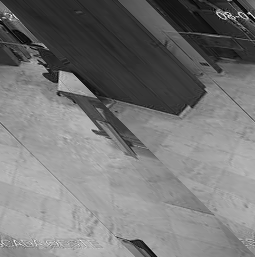

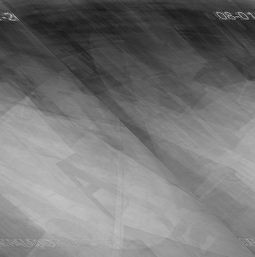

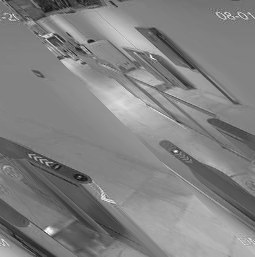

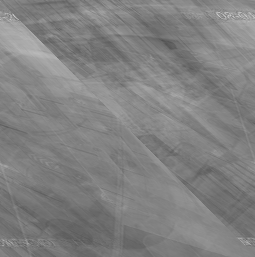

In [80]:

pca_pixels_scaled = pca.inverse_transform(test_pca_results)
recon_pixels      = scaler.inverse_transform(pca_pixels_scaled)

img_width = 255

idx = 0
display(make_image(test_pixel_data[idx],    width=img_width))
display(make_image(recon_pixels[idx].tolist(), width=img_width))

idx = 10
display(make_image(test_pixel_data[idx],     width=img_width))
display(make_image(recon_pixels[idx].tolist(),  width=img_width))


### Interpretation

<span style="color:hotpink"><br>
The reconstructed images from the `test` set will always be noisier than the `train` images.<br><br>
Why?<br><br>
</span>

<span style="color:hotpink;">The model learns from the training data, hence, the higher accuracy on those</span>



Run the classifier and get predicted labels. Then get its accuracy ratio is by running the `CamUtils.classification_accuracy()` function with the list of filenames and list of predictions.

In [81]:
# TODO: run classifier. This is the same classifier already fitted on the train data above
test_predictions = clf.predict(test_pca_df)
# TODO: get accuracy
test_acc = CamUtils.classification_accuracy(test_files, test_predictions)
print(f"Test set accuracy: {test_acc:.2%}")

Test set accuracy: 88.87%


### Interpretation

<span style="color:hotpink">
What's the accuracy ? How could we improve that if we wanted ?<br>
How does this compare to the classification model from <code>Homework07</code>? They can both be tuned to perform well, but how many features did we need last time in order to get an accuracy comparable to this?
</span>

<span style="color:hotpink;">I think the 91% accuracy is kind of good with n=10 in PCA and 88 with n=8 in PCA. Definitely higher than what was made in HW7</span>